Final state distribution: {'Controlled': 2, 'Uncontrolled': 1, 'Complications': 1, 'Death': 96}


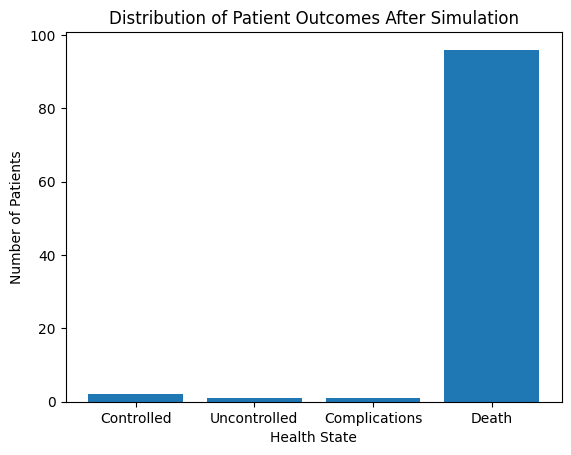

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define states and transition matrix
states = ["Controlled", "Uncontrolled", "Complications", "Death"]
transition_matrix = np.array([
    [0.80, 0.15, 0.03, 0.02],
    [0.20, 0.60, 0.15, 0.05],
    [0.00, 0.10, 0.80, 0.10],
    [0.00, 0.00, 0.00, 1.00]
])

# Simulate one patient's trajectory
def simulate_patient(n_steps, start_state):
    current_state = start_state
    trajectory = [current_state]
    for _ in range(n_steps):
        next_state = np.random.choice(len(states), p=transition_matrix[current_state])
        trajectory.append(next_state)
        current_state = next_state
        if current_state == 3:  # Death is absorbing
            break
    return trajectory

# Run simulation for 100 patients
n_patients = 100
n_steps = 60  # e.g., 5 years with monthly steps
outcomes = [simulate_patient(n_steps, start_state=0) for _ in range(n_patients)]

# Analyze results (e.g., count final states)
final_states = [traj[-1] for traj in outcomes]
state_counts = [final_states.count(i) for i in range(len(states))]
print("Final state distribution:", dict(zip(states, state_counts)))

# Visualize
plt.bar(states, state_counts)
plt.title("Distribution of Patient Outcomes After Simulation")
plt.xlabel("Health State")
plt.ylabel("Number of Patients")
plt.show()